In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [3]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

In [4]:
filtered_crusttop = final_df[final_df['Step'].str.strip() == 'Add crust top']
filtered_crusttop

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C001,36,Add crust top,209.483986,263.142734,294.557339,274.961739,290.218322,618.742198,0.000000,0.000000
16,C003,58,Add crust top,76.421864,90.498375,49.316725,84.409906,71.150257,424.487148,305.036468,189.421069
27,C006,42,Add crust top,0.000000,298.058736,0.000000,0.000000,431.436902,333.414390,0.000000,0.000000
38,C008,34,Add crust top,309.416528,397.550724,493.328771,445.495948,501.744381,713.207780,643.766223,500.766993
49,C009,24,Add crust top,201.770038,304.271309,366.606081,304.984571,383.776629,603.685648,483.479056,362.584271
60,C012,54,Add crust top,295.475928,313.922341,774.968875,520.193362,824.403049,751.640742,641.536370,440.378118
71,C013,48,Add crust top,339.446726,380.699478,372.494542,383.665401,448.364317,642.754633,529.379843,432.265120
82,C016,39,Add crust top,359.238444,667.215096,870.808695,775.141509,1063.078550,1119.697352,967.942231,700.132171
93,C017,36,Add crust top,0.000000,289.772655,116.734822,243.133306,269.718865,690.086769,572.059254,386.049984
104,C020,30,Add crust top,193.082118,305.221242,304.799172,272.935211,354.539324,641.650769,500.926769,351.598562


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_crusttop = filtered_crusttop.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_crusttop.select_dtypes(include=['float64', 'int64']).columns
filtered_crusttop[numerical_cols] = filtered_crusttop[numerical_cols].replace(0, np.nan)

filtered_crusttop[numerical_cols] = imputer.fit_transform(filtered_crusttop[numerical_cols])
filtered_crusttop

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
5,C001,36.0,Add crust top,209.483986,263.142734,294.557339,274.961739,290.218322,618.742198,500.926769,351.598562
16,C003,58.0,Add crust top,76.421864,90.498375,49.316725,84.409906,71.150257,424.487148,305.036468,189.421069
27,C006,42.0,Add crust top,201.770038,298.058736,366.606081,304.984571,431.436902,333.414390,483.479056,362.584271
38,C008,34.0,Add crust top,309.416528,397.550724,493.328771,445.495948,501.744381,713.207780,643.766223,500.766993
49,C009,24.0,Add crust top,201.770038,304.271309,366.606081,304.984571,383.776629,603.685648,483.479056,362.584271
60,C012,54.0,Add crust top,295.475928,313.922341,774.968875,520.193362,824.403049,751.640742,641.536370,440.378118
71,C013,48.0,Add crust top,339.446726,380.699478,372.494542,383.665401,448.364317,642.754633,529.379843,432.265120
82,C016,39.0,Add crust top,359.238444,667.215096,870.808695,775.141509,1063.078550,1119.697352,967.942231,700.132171
93,C017,36.0,Add crust top,198.353102,289.772655,116.734822,243.133306,269.718865,690.086769,572.059254,386.049984
104,C020,30.0,Add crust top,193.082118,305.221242,304.799172,272.935211,354.539324,641.650769,500.926769,351.598562


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Crusttop',
    'HeadCamera Distance': 'HeadCamera Distance - Add Crusttop',
    'LeftElbow Distance': 'LeftElbow Distance - Add Crusttop',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Crusttop',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Crusttop',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Crusttop',
    'RightElbow Distance': 'RightElbow Distance - Add Crusttop',
    'RightShoulder Distance': 'RightShoulder Distance - Add Crusttop'
}

# Rename columns
filtered_crusttop = filtered_crusttop.rename(columns=new_column_names)
filtered_crusttop

,Participant,Block Design Raw Score,Step,Chest Distance - Add Crusttop,HeadCamera Distance - Add Crusttop,LeftElbow Distance - Add Crusttop,LeftShoulder Distance - Add Crusttop,MotionControllerLeft Distance - Add Crusttop,MotionControllerRight Distance - Add Crusttop,RightElbow Distance - Add Crusttop,RightShoulder Distance - Add Crusttop
5,C001,36.0,Add crust top,209.483986,263.142734,294.557339,274.961739,290.218322,618.742198,500.926769,351.598562
16,C003,58.0,Add crust top,76.421864,90.498375,49.316725,84.409906,71.150257,424.487148,305.036468,189.421069
27,C006,42.0,Add crust top,201.770038,298.058736,366.606081,304.984571,431.436902,333.414390,483.479056,362.584271
38,C008,34.0,Add crust top,309.416528,397.550724,493.328771,445.495948,501.744381,713.207780,643.766223,500.766993
49,C009,24.0,Add crust top,201.770038,304.271309,366.606081,304.984571,383.776629,603.685648,483.479056,362.584271
60,C012,54.0,Add crust top,295.475928,313.922341,774.968875,520.193362,824.403049,751.640742,641.536370,440.378118
71,C013,48.0,Add crust top,339.446726,380.699478,372.494542,383.665401,448.364317,642.754633,529.379843,432.265120
82,C016,39.0,Add crust top,359.238444,667.215096,870.808695,775.141509,1063.078550,1119.697352,967.942231,700.132171
93,C017,36.0,Add crust top,198.353102,289.772655,116.734822,243.133306,269.718865,690.086769,572.059254,386.049984
104,C020,30.0,Add crust top,193.082118,305.221242,304.799172,272.935211,354.539324,641.650769,500.926769,351.598562


In [7]:
#filtered_crusttop.to_csv('ComplexPie_AddCrusttop.csv',index=False)

In [8]:
tracker_columns = ['Chest Distance - Add Crusttop', 'HeadCamera Distance - Add Crusttop', 'LeftElbow Distance - Add Crusttop', 'LeftShoulder Distance - Add Crusttop',
                   'RightElbow Distance - Add Crusttop', 'RightShoulder Distance - Add Crusttop', 'MotionControllerLeft Distance - Add Crusttop',
                   'MotionControllerRight Distance - Add Crusttop']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_crusttop, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_crusttop[block_design_col], filtered_crusttop[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_crusttop, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Add Crusttop,0.122980,0.662370
1,HeadCamera Distance - Add Crusttop,-0.218443,0.434128
2,LeftElbow Distance - Add Crusttop,-0.193549,0.489466
3,LeftShoulder Distance - Add Crusttop,-0.206094,0.461172
4,RightElbow Distance - Add Crusttop,0.173094,0.537289
5,RightShoulder Distance - Add Crusttop,0.257399,0.354364
6,MotionControllerLeft Distance - Add Crusttop,-0.153984,0.583742
7,MotionControllerRight Distance - Add Crusttop,0.352732,0.197211


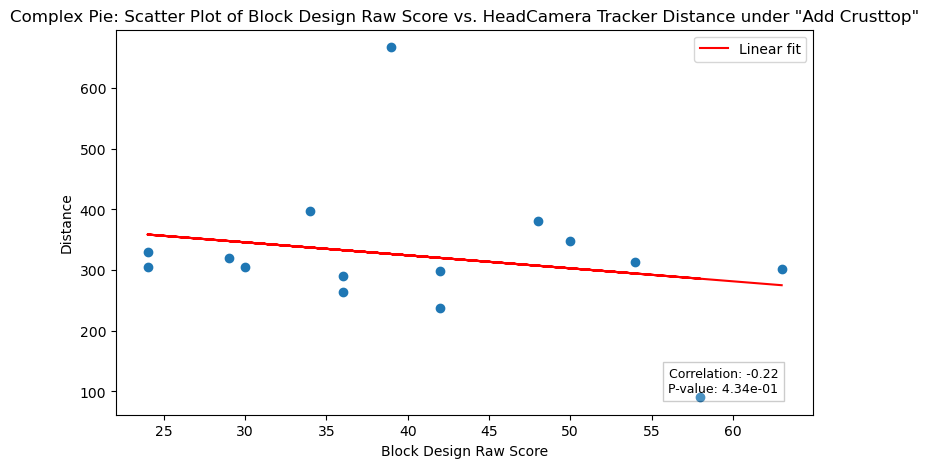

In [9]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['HeadCamera Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['HeadCamera Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['HeadCamera Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '41 CP_CrusttopDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

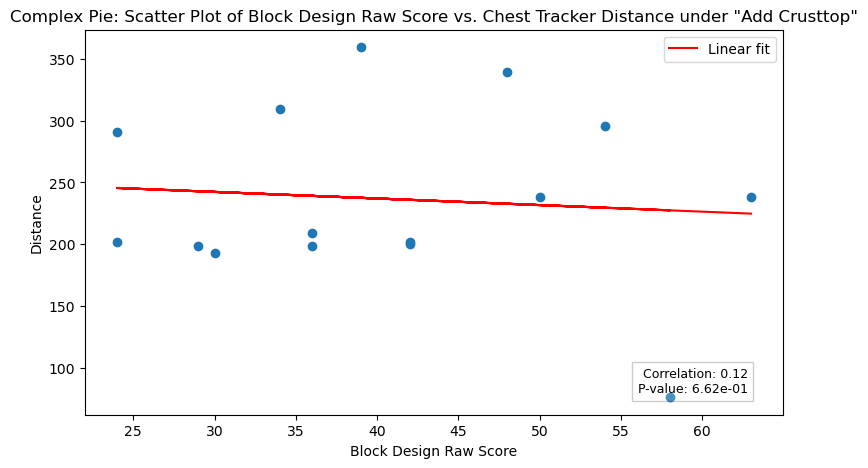

In [10]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['Chest Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['Chest Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['Chest Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '42 CP_CrusttopDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

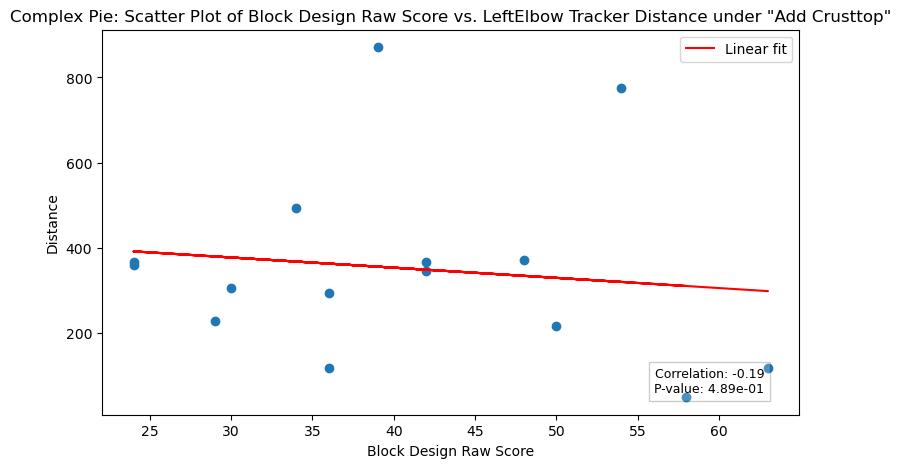

In [11]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftElbow Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftElbow Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftElbow Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '43 CP_CrusttopDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

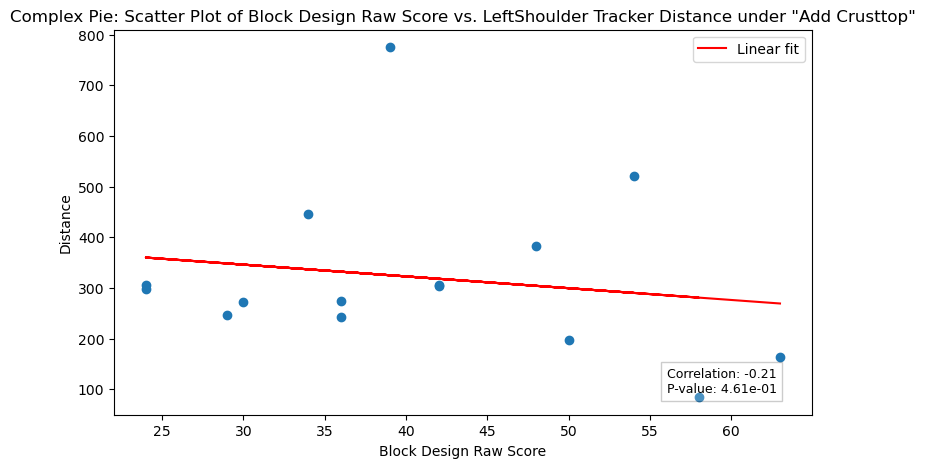

In [12]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftShoulder Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftShoulder Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['LeftShoulder Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '44 CP_CrusttopDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

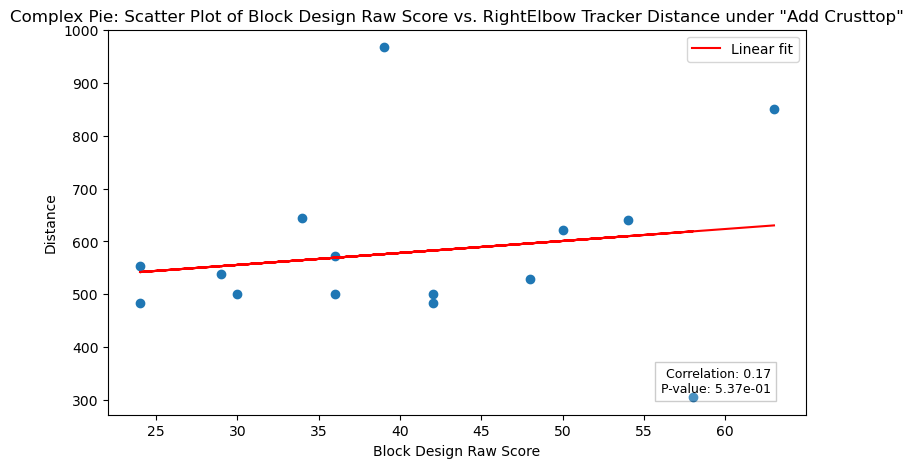

In [13]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightElbow Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightElbow Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightElbow Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '45 CP_CrusttopDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

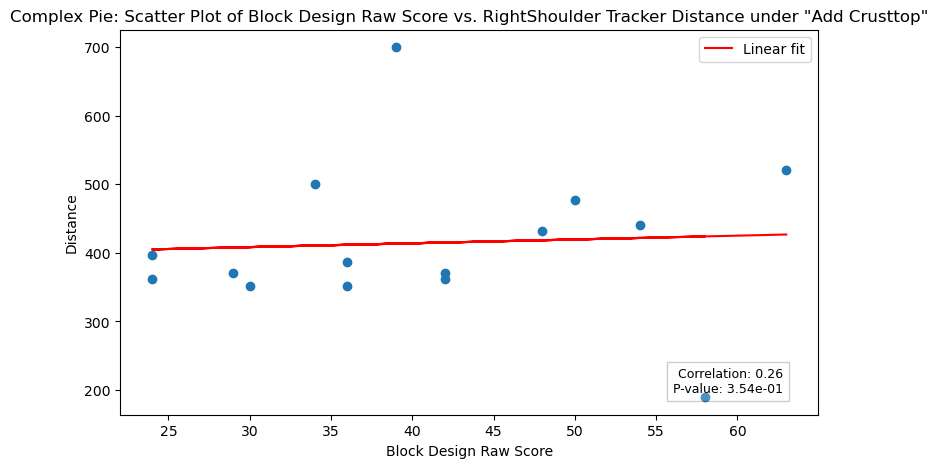

In [14]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightShoulder Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightShoulder Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['RightShoulder Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '46 CP_CrusttopDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

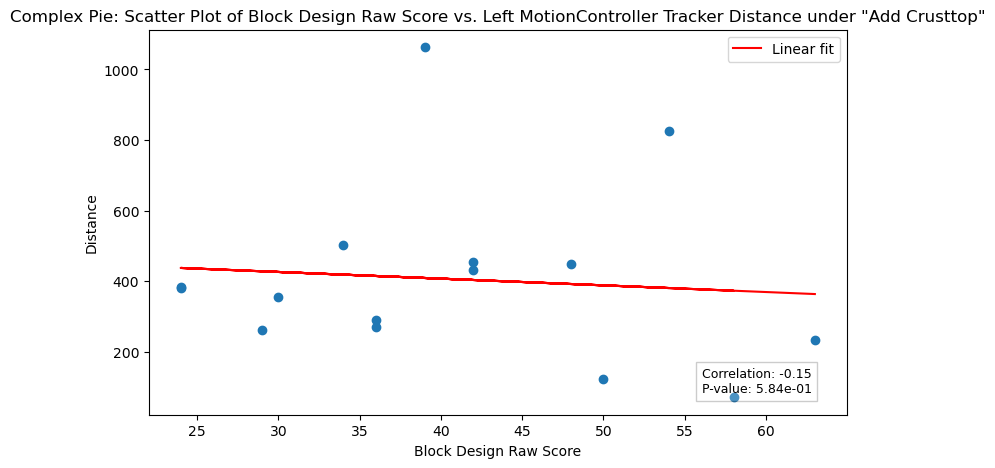

In [15]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerLeft Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerLeft Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerLeft Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '47 CP_CrusttopDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

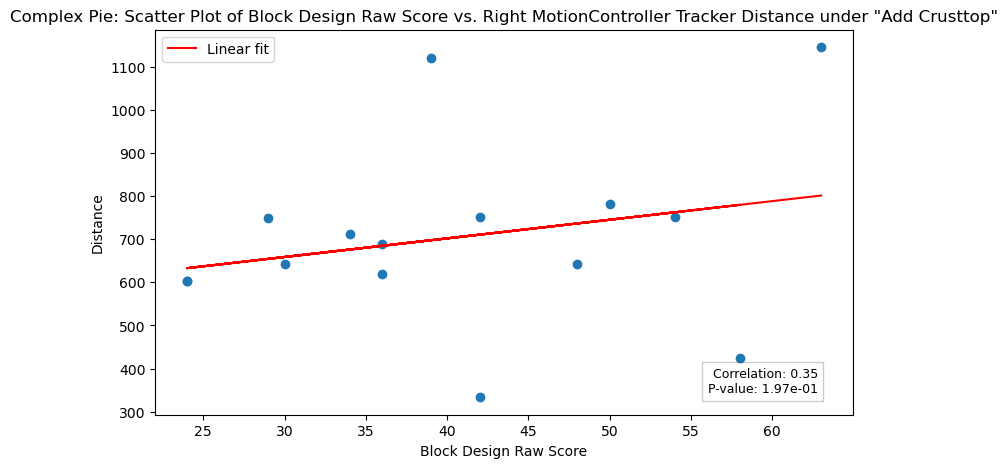

In [16]:
correlation, p_value = spearmanr(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerRight Distance - Add Crusttop'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerRight Distance - Add Crusttop'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_crusttop['Block Design Raw Score'], filtered_crusttop['MotionControllerRight Distance - Add Crusttop'], 1)
fit_line = slope * filtered_crusttop['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_crusttop['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Tracker Distance under "Add Crusttop"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '48 CP_CrusttopDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()